In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sb
import torch.nn as nn
import torch.utils.data as data

In [2]:
device = torch.device("cuda") 
torch.cuda.is_available()

True

In [3]:
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(1248)
    torch.cuda.manual_seed_all(1248)

    
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

In [26]:
pd.options.display.max_columns = None # Wyswietlanie wszystkich kolumn

df_train = pd.read_csv('data/train_data.csv')
non_numeric_df_train = df_train.select_dtypes('object')
for column in non_numeric_df_train.columns:
    print(f'Unique values for {column} --> ', non_numeric_df_train[column].unique())

Unique values for HallwayType -->  ['corridor' 'terraced' 'mixed']
Unique values for HeatingType -->  ['individual_heating' 'central_heating']
Unique values for AptManageType -->  ['self_management' 'management_in_trust']
Unique values for TimeToBusStop -->  ['0~5min' '5min~10min' '10min~15min']
Unique values for TimeToSubway -->  ['5min~10min' '0-5min' '15min~20min' '10min~15min' 'no_bus_stop_nearby']
Unique values for SubwayStation -->  ['Daegu' 'Sin-nam' 'Myung-duk' 'Kyungbuk_uni_hospital' 'Chil-sung-market'
 'Bangoge' 'Banwoldang' 'no_subway_nearby']


In [27]:
{column : non_numeric_df_train[column].unique() for column in non_numeric_df_train.columns}

{'HallwayType': array(['corridor', 'terraced', 'mixed'], dtype=object),
 'HeatingType': array(['individual_heating', 'central_heating'], dtype=object),
 'AptManageType': array(['self_management', 'management_in_trust'], dtype=object),
 'TimeToBusStop': array(['0~5min', '5min~10min', '10min~15min'], dtype=object),
 'TimeToSubway': array(['5min~10min', '0-5min', '15min~20min', '10min~15min',
        'no_bus_stop_nearby'], dtype=object),
 'SubwayStation': array(['Daegu', 'Sin-nam', 'Myung-duk', 'Kyungbuk_uni_hospital',
        'Chil-sung-market', 'Bangoge', 'Banwoldang', 'no_subway_nearby'],
       dtype=object)}

In [7]:
df_test = pd.read_csv('data/test_data.csv')
non_numeric_df_test = df_test.select_dtypes('object')
for column in non_numeric_df_test.columns:
    print(f'Unique values for {column} --> ', non_numeric_df_test[column].unique())

Unique values for HallwayType -->  ['mixed' 'terraced' 'corridor']
Unique values for HeatingType -->  ['individual_heating' 'central_heating']
Unique values for AptManageType -->  ['management_in_trust' 'self_management']
Unique values for TimeToBusStop -->  ['0~5min' '5min~10min' '10min~15min']
Unique values for TimeToSubway -->  ['15min~20min' '0-5min' 'no_bus_stop_nearby' '10min~15min' '5min~10min']
Unique values for SubwayStation -->  ['Myung-duk' 'Kyungbuk_uni_hospital' 'no_subway_nearby' 'Banwoldang'
 'Sin-nam' 'Bangoge' 'Chil-sung-market' 'Daegu']


In [8]:
df_train.SalePrice = (df_train.SalePrice > 300_000).astype(float)

In [9]:
df_train

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,N_manager,N_elevators,SubwayStation,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,0.0,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
1,0.0,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,1.0,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,6.0,5.0,11.0,Sin-nam,1.0,1,0.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
3,0.0,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,8.0,20.0,Myung-duk,6.0,2,0.0,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
4,0.0,1992,2007,8,355,5,corridor,individual_heating,management_in_trust,200.0,0.0,5min~10min,10min~15min,3.0,5.0,10.0,Myung-duk,7.0,1,1.0,1.0,5.0,1.0,4.0,3.0,5.0,5.0,3,16.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1.0,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,14.0,16.0,Kyungbuk_uni_hospital,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4120,0.0,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,181.0,5min~10min,0-5min,3.0,3.0,11.0,Myung-duk,3.0,1,1.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
4121,1.0,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,14.0,16.0,Kyungbuk_uni_hospital,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4122,1.0,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,2.0,1.0,4.0,Kyungbuk_uni_hospital,3.0,2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


# Zamiana na wartości binarne

In [10]:
df_train['HeatingType'] = (df_train['HeatingType'] == 'individual_heating').astype(float)
df_train['AptManageType'] = (df_train['AptManageType'] == 'management_in_trust').astype(float)

df_test['HeatingType'] = (df_test['HeatingType'] == 'individual_heating').astype(float)
df_test['AptManageType'] = (df_test['AptManageType'] == 'management_in_trust').astype(float)

In [25]:
df_train['HeatingType']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4119    1.0
4120    1.0
4121    1.0
4122    1.0
4123    1.0
Name: HeatingType, Length: 4124, dtype: float64

# Modyfikacja czasu

In [11]:
import re
def convert_time(column, df):
    try:
        for time in df[column].unique():
            if time == 'no_bus_stop_nearby':
                df[column] = df[column].replace(time, '60')
            else:
                df[column] = df[column].replace(time, str(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", time)[-1]))
        df[column] = df[column].astype(float, errors='raise').abs()
        return df
    except Exception:
        print('Dane zwiazane z czasem juz sa zmienione')
        return df

time_col = ['TimeToBusStop', 'TimeToSubway']
for col in time_col:
    df_train = convert_time(col, df_train)
    df_test = convert_time(col, df_test)

# Podział na dane numeryczne i kategoryczne

In [12]:
categorical_columns = ['HallwayType', 'SubwayStation']
categorical_train_values = pd.get_dummies(df_train[categorical_columns])
categorical_test_values = pd.get_dummies(df_test[categorical_columns])
categorical_train_values.head()

,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,True,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,True,False,False


In [13]:
df_train.drop(columns=categorical_columns,inplace=True)
df_test.drop(columns=categorical_columns,inplace=True)

In [14]:
train_indices = np.random.rand(len(df_train)) > 0.1

In [15]:
numerical_train_data = torch.from_numpy(df_train.values[train_indices, 1:]).float()
categorical_train_data = torch.from_numpy(categorical_train_values.values[train_indices]).float()
train_targets = torch.from_numpy(df_train.values[train_indices, 0]).float()

numerical_evaluate_data = torch.from_numpy(df_train.values[~train_indices, 1:]).float()
categorical_evaluate_data = torch.from_numpy(categorical_train_values.values[~train_indices]).float()
evaluate_targets = torch.from_numpy(df_train.values[~train_indices, 0]).float()

numerical_test_data = torch.from_numpy(df_test.values[:]).float()
categorical_test_data = torch.from_numpy(categorical_test_values.values[:]).float()

In [24]:
type(categorical_test_data)

torch.Tensor

In [16]:
categorical_evaluate_data.shape

torch.Size([431, 11])

In [17]:
numerical_train_data.shape

torch.Size([3693, 27])

In [18]:
categorical_train_data.shape

torch.Size([3693, 11])

In [19]:
train_dataset = data.TensorDataset(numerical_train_data, categorical_train_data, train_targets)
evaluate_dataset = data.TensorDataset(numerical_evaluate_data, categorical_evaluate_data, evaluate_targets)
test_dataset = data.TensorDataset(numerical_test_data, categorical_test_data)

In [29]:
type(train_dataset)

torch.utils.data.dataset.TensorDataset

In [20]:
class RealEstateClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.emb_layer = nn.Linear(categorical_train_data.shape[1], categorical_train_data.shape[1])
        self.act_emb = nn.Tanh()
        self.layer1 = nn.Linear(categorical_train_data.shape[1] + numerical_train_data.shape[1], 300)
        self.bn1 = nn.BatchNorm1d(300)
        self.act_1 = nn.LeakyReLU()
        self.d1 = nn.Dropout(0.4)
        self.layer2 = nn.Linear(300, 150)
        self.bn2 = nn.BatchNorm1d(150)
        self.act_2 = nn.LeakyReLU()
        self.d2 = nn.Dropout(0.4)
        self.layer3 = nn.Linear(150, 1)
        self.act_3 = nn.Sigmoid()
    def forward(self, x, cat_x):
        cat_x_embedded = self.emb_layer(cat_x)
        cat_x_embedded = self.act_emb(cat_x_embedded)
        x = torch.cat([x, cat_x_embedded], dim=1)
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.act_1(x)
        x = self.d1(x)
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.act_2(x)
        x = self.d2(x)
        x = self.layer3(x)
        x = self.act_3(x)
        
        return x

In [21]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    model.eval()
    for x, cat_x, labels in data_loader:
        x, cat_x, labels = x.to(device), cat_x.to(device), labels.to(device)
        output = model(x, cat_x)
        pred = output>0.99
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += x.shape[0]
    return correct / total

In [22]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
evaluate_loader = torch.utils.data.DataLoader(evaluate_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [28]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [20]:
model = RealEstateClassifier().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

criterion = nn.BCEWithLogitsLoss()

losses = []
train_acc = []
val_acc = []
for n in range(1000):
    epoch_losses = []
    for x, cat_x, labels in iter(train_loader):
        x, cat_x, labels = x.to(device), cat_x.to(device), labels.to(device)
        model.train()
        out = model(x, cat_x).squeeze()

        loss = criterion(out, labels)
        loss.backward()
        epoch_losses.append(loss.item())
        optimizer.step()
        optimizer.zero_grad()
    loss_mean = np.array(epoch_losses).mean()
    losses.append(loss_mean)
    print(f'Epoch {n} loss {loss_mean:.3}')
    train_acc.append(get_accuracy(model, train_loader))
    
    # Evaluate
    test_acc = get_accuracy(model, evaluate_loader)
    val_acc.append(test_acc)
    

print('Final Training Accuracy: {}'.format(train_acc[-1]))
print("Final Validation Accuracy: {}".format(val_acc[-1]))

Epoch 0 loss 0.729
Epoch 1 loss 0.678
Epoch 2 loss 0.667
Epoch 3 loss 0.659
Epoch 4 loss 0.657
Epoch 5 loss 0.656
Epoch 6 loss 0.654
Epoch 7 loss 0.652
Epoch 8 loss 0.65
Epoch 9 loss 0.648
Epoch 10 loss 0.649
Epoch 11 loss 0.647
Epoch 12 loss 0.647
Epoch 13 loss 0.648
Epoch 14 loss 0.647
Epoch 15 loss 0.646
Epoch 16 loss 0.645
Epoch 17 loss 0.645
Epoch 18 loss 0.646
Epoch 19 loss 0.644
Epoch 20 loss 0.644
Epoch 21 loss 0.645
Epoch 22 loss 0.643
Epoch 23 loss 0.642
Epoch 24 loss 0.643
Epoch 25 loss 0.644
Epoch 26 loss 0.642
Epoch 27 loss 0.642
Epoch 28 loss 0.641
Epoch 29 loss 0.64
Epoch 30 loss 0.641
Epoch 31 loss 0.64
Epoch 32 loss 0.637
Epoch 33 loss 0.639
Epoch 34 loss 0.636
Epoch 35 loss 0.637
Epoch 36 loss 0.639
Epoch 37 loss 0.64
Epoch 38 loss 0.637
Epoch 39 loss 0.638
Epoch 40 loss 0.637
Epoch 41 loss 0.637
Epoch 42 loss 0.638
Epoch 43 loss 0.637
Epoch 44 loss 0.636
Epoch 45 loss 0.636
Epoch 46 loss 0.636
Epoch 47 loss 0.636
Epoch 48 loss 0.635
Epoch 49 loss 0.635
Epoch 50 loss 

In [21]:
from sklearn.metrics import roc_auc_score

with torch.no_grad():
    numerical_evaluate_data = numerical_evaluate_data.cpu()
    categorical_evaluate_data = categorical_evaluate_data.cpu()
    model.cpu()
    r = roc_auc_score(evaluate_targets, model(numerical_evaluate_data, categorical_evaluate_data))
r

0.9915146518258957

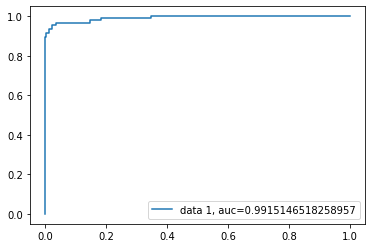

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt

with torch.no_grad():
    fpr, tpr, _ = metrics.roc_curve(evaluate_targets, model(numerical_evaluate_data, categorical_evaluate_data))
    auc = metrics.roc_auc_score(evaluate_targets, model(numerical_evaluate_data, categorical_evaluate_data))
    
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [23]:
with torch.no_grad():
    pred = model(numerical_test_data, categorical_test_data).numpy()
    
results = pd.DataFrame(pred)
results.insert(1, column=None, value=(pred>0.99).astype(int))
results.to_csv('prediction.csv', index=False, header=None)